In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

In [2]:
import numpy as np

indexes = np.random.randint(70000, size=7000)

xtrain = mnist.data[indexes][:4900]
xtest = mnist.data[indexes][4900:]

ytrain = mnist.target[indexes][:4900]
ytest = mnist.target[indexes][4900:]

# xtrain = mnist.data[:4900]
# xtest = mnist.data[4900:]

# ytrain = mnist.target[:49000]
# ytest = mnist.target[49000:]

In [3]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(50))

In [4]:
clf.fit(xtrain, ytrain)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=50, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [5]:
import matplotlib.pyplot as plt

itest = 19

#images = xtest.reshape((-1, 28, 28))
#plt.imshow(images[itest],cmap=plt.cm.gray_r,interpolation="nearest")
#plt.show()

found_classes = clf.predict(xtest)

for itest in range(1,20):
    #itest = 4
    
    res =  " OK" if ytest[itest] == found_classes[itest] else ""

    print("Classe : " + ytest[itest] + " / Attendu " + found_classes[itest] + res)



Classe : 6 / Attendu 4
Classe : 5 / Attendu 5 OK
Classe : 8 / Attendu 9
Classe : 1 / Attendu 1 OK
Classe : 9 / Attendu 9 OK
Classe : 6 / Attendu 6 OK
Classe : 4 / Attendu 4 OK
Classe : 8 / Attendu 8 OK
Classe : 8 / Attendu 8 OK
Classe : 1 / Attendu 1 OK
Classe : 9 / Attendu 9 OK
Classe : 1 / Attendu 1 OK
Classe : 4 / Attendu 4 OK
Classe : 1 / Attendu 1 OK
Classe : 0 / Attendu 0 OK
Classe : 4 / Attendu 4 OK
Classe : 7 / Attendu 7 OK
Classe : 4 / Attendu 4 OK
Classe : 6 / Attendu 4


In [6]:
from sklearn.metrics import precision_score

print("Score clf : " + str(clf.score(xtest, ytest)))
print("Score micro : " + str(precision_score(ytest, found_classes, average="micro")))
print("Score macro : " + str(precision_score(ytest, found_classes, average="macro")))
print("Score weighted : " + str(precision_score(ytest, found_classes, average="weighted")))

Score clf : 0.8466666666666667
Score micro : 0.8466666666666667
Score macro : 0.8451330991570052
Score weighted : 0.8472230680266543


# Tests de précision
- 2 couches à 50 neurones
- 10 couches à 50 neurones
- 20 couches à 50 neurones
- 50 couches à 50 neurones
- 100 couches à 50 neurones

Puis faire 50 couches avec 60, 59, 58, ... neurones

Puis faire 20 couches avec 60, 57, 54, ... neurones

In [7]:
couche = (50,)
scores_couches_test = []
scores_couches_train = []

nb_couches = [1, 2, 10, 20, 50, 100]



for i in nb_couches:
    

    clf = MLPClassifier(hidden_layer_sizes=(couche*i))
    clf.fit(xtrain, ytrain)

    score_test = clf.score(xtest, ytest)
    scores_couches_test.append(score_test)
    
    score_train = clf.score(xtrain, ytrain)
    scores_couches_train.append(score_train)
    
    print("Couches : " + str(i) + " -> " + str(score_test))
    print("Couches : " + str(i) + " -> " + str(score_train))

    



Couches : 1 -> 0.8614285714285714
Couches : 1 -> 0.9851020408163266
Couches : 2 -> 0.8652380952380953
Couches : 2 -> 1.0
Couches : 10 -> 0.9257142857142857
Couches : 10 -> 1.0
Couches : 20 -> 0.9257142857142857
Couches : 20 -> 0.9936734693877551
Couches : 50 -> 0.7704761904761904
Couches : 50 -> 0.8122448979591836
Couches : 100 -> 0.11714285714285715
Couches : 100 -> 0.11285714285714285


Text(0.5, 1.0, 'Score pour différents nombre de couches de 50 neurones')

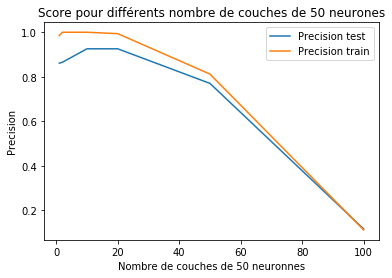

In [8]:
plt.plot([x for x in nb_couches], scores_couches_test)
plt.plot([x for x in nb_couches], scores_couches_train)

plt.legend(['Precision test', 'Precision train'], loc='upper right')
plt.xlabel("Nombre de couches de 50 neuronnes")
plt.ylabel("Precision")
plt.title("Score pour différents nombre de couches de 50 neurones")

On voit sur notre graphique que la précision pour les données d'entrainement diminue également. cela signifie que notre algoritme n'arrive pas à généraliser notre modèle
# Overfitting
L'algorithme est tellement bien entrainé avec toutes les valeurs dont il dispose en train qui fait de mauvaises prédictions. Exemple avec la droite



Calculer la précision pour 50 couches de 60, puis 59, puis 58, ... neurones.

In [9]:
couches = (60,)
for i in range(59 , 10, -1):
    couches = couches + (i,)
    
print(couches)


clf = MLPClassifier(hidden_layer_sizes=(couches))
clf.fit(xtrain, ytrain)


(60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50,
                                  49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39,
                                  38, 37, 36, 35, 34, 33, 32, 31, ...),
              learning_rate='constant', learning_rate_init=0.001, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [10]:
score_test = clf.score(xtest, ytest)
score_train = clf.score(xtrain, ytrain)
print(score_test)
print(score_train)

0.83
0.9253061224489796


Calculer la précision pour 20 couches de 60, puis 57, puis 54, ... neurones.

In [11]:
couches = (60,)
for i in range(57 , 0, -3):
    couches = couches + (i,)
    
print(couches)


clf = MLPClassifier(hidden_layer_sizes=(couches))
clf.fit(xtrain, ytrain)


(60, 57, 54, 51, 48, 45, 42, 39, 36, 33, 30, 27, 24, 21, 18, 15, 12, 9, 6, 3)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(60, 57, 54, 51, 48, 45, 42, 39, 36, 33, 30,
                                  27, 24, 21, 18, 15, 12, 9, 6, 3),
              learning_rate='constant', learning_rate_init=0.001, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [12]:
score_test = clf.score(xtest, ytest)
score_train = clf.score(xtrain, ytrain)
print(score_test)
print(score_train)

0.9138095238095238
0.9897959183673469


In [96]:
import time

for count in range(0, 5):
    nb_couches = np.random.randint(1, high=11)

    for i in range(1, nb_couches+1):
        nb_neurones = np.random.randint(10, 311)

        if i == 1:
            couches = (nb_neurones,)
        else:
            couches = couches + (nb_neurones,)


    clf = MLPClassifier(hidden_layer_sizes=(couches))
    start_time = time.time()
    clf.fit(xtrain, ytrain)
    exec_time = time.time() - start_time


    score_test = clf.score(xtest, ytest)
    score_train = clf.score(xtrain, ytrain)

    print(str(couches))
    print("\t" + "-> " + str(exec_time) + " sec")
    print("\t" + "-> Score test : " + str(score_test))
    print("\t" + "-> Score train : " + str(score_train))

(38, 53, 122, 123)
	-> 6.383291959762573 sec
	-> Score test : 0.8814285714285715
	-> Score train : 1.0
(301, 282, 228, 88, 306, 188, 267, 32)
	-> 19.300959825515747 sec
	-> Score test : 0.9280952380952381
	-> Score train : 0.9979591836734694
(156,)
	-> 4.69936466217041 sec
	-> Score test : 0.9033333333333333
	-> Score train : 0.9951020408163266
(140, 109, 118, 173, 11)
	-> 17.578479766845703 sec
	-> Score test : 0.9128571428571428
	-> Score train : 0.990204081632653
(106, 80, 105, 271)
	-> 6.782761573791504 sec
	-> Score test : 0.8757142857142857
	-> Score train : 1.0


Couches : 1 -> 0.26761904761904765
Couches : 1 -> 0.26448979591836735
Couches : 2 -> 0.8709523809523809
Couches : 2 -> 0.9369387755102041
Couches : 10 -> 0.9042857142857142
Couches : 10 -> 1.0
Couches : 20 -> 0.17047619047619048
Couches : 20 -> 0.1736734693877551
Couches : 50 -> 0.11714285714285715
Couches : 50 -> 0.11285714285714285
Couches : 100 -> 0.11714285714285715
Couches : 100 -> 0.11285714285714285


Text(0.5, 1.0, 'Algorithme L-FBGS : Score pour différents nombre de couches de 50 neurones')

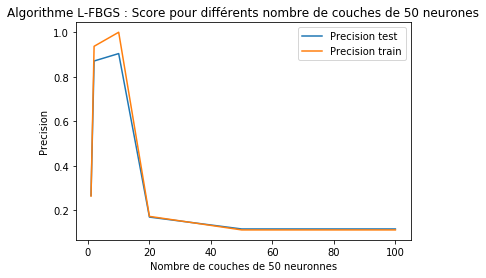

In [97]:
couche = (50,)
scores_couches_test = []
scores_couches_train = []

nb_couches = [1, 2, 10, 20, 50, 100]

for i in nb_couches:
    clf = MLPClassifier(hidden_layer_sizes=(couche*i), solver='lbfgs')
    clf.fit(xtrain, ytrain)

    score_test = clf.score(xtest, ytest)
    scores_couches_test.append(score_test)
    
    score_train = clf.score(xtrain, ytrain)
    scores_couches_train.append(score_train)
    
    print("Couches : " + str(i) + " -> " + str(score_test))
    print("Couches : " + str(i) + " -> " + str(score_train))
    
plt.plot([x for x in nb_couches], scores_couches_test)
plt.plot([x for x in nb_couches], scores_couches_train)

plt.legend(['Precision test', 'Precision train'], loc='upper right')
plt.xlabel("Nombre de couches de 50 neuronnes")
plt.ylabel("Precision")
plt.title("Algorithme L-FBGS : Score pour différents nombre de couches de 50 neurones")

Couches : 1 -> 0.3742857142857143
Couches : 1 -> 0.39163265306122447
Couches : 2 -> 0.24952380952380954
Couches : 2 -> 0.25816326530612244
Couches : 10 -> 0.8890476190476191
Couches : 10 -> 1.0
Couches : 20 -> 0.8709523809523809
Couches : 20 -> 0.9646938775510204
Couches : 50 -> 0.11714285714285715
Couches : 50 -> 0.11285714285714285
Couches : 100 -> 0.11714285714285715
Couches : 100 -> 0.11285714285714285


Text(0.5, 1.0, 'Algorithme SGD : Score pour différents nombre de couches de 50 neurones')

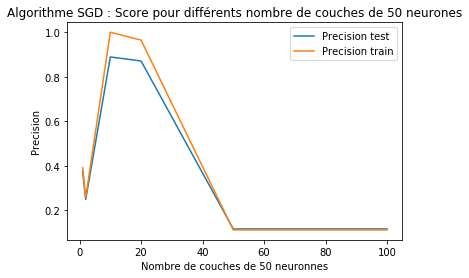

In [99]:
couche = (50,)
scores_couches_test = []
scores_couches_train = []

nb_couches = [1, 2, 10, 20, 50, 100]

for i in nb_couches:
    clf = MLPClassifier(hidden_layer_sizes=(couche*i), solver='sgd')
    clf.fit(xtrain, ytrain)

    score_test = clf.score(xtest, ytest)
    scores_couches_test.append(score_test)
    
    score_train = clf.score(xtrain, ytrain)
    scores_couches_train.append(score_train)
    
    print("Couches : " + str(i) + " -> " + str(score_test))
    print("Couches : " + str(i) + " -> " + str(score_train))
    
plt.plot([x for x in nb_couches], scores_couches_test)
plt.plot([x for x in nb_couches], scores_couches_train)

plt.legend(['Precision test', 'Precision train'], loc='upper right')
plt.xlabel("Nombre de couches de 50 neuronnes")
plt.ylabel("Precision")
plt.title("Algorithme SGD : Score pour différents nombre de couches de 50 neurones")

Couches : 1 -> 0.8690476190476191
Couches : 1 -> 0.9755102040816327
Couches : 2 -> 0.8461904761904762
Couches : 2 -> 1.0
Couches : 10 -> 0.9176190476190477
Couches : 10 -> 1.0
Couches : 20 -> 0.9166666666666666
Couches : 20 -> 0.996734693877551
Couches : 50 -> 0.7571428571428571
Couches : 50 -> 0.8040816326530612
Couches : 100 -> 0.11714285714285715
Couches : 100 -> 0.11285714285714285


Text(0.5, 1.0, 'Algorithme ADAM : Score pour différents nombre de couches de 50 neurones')

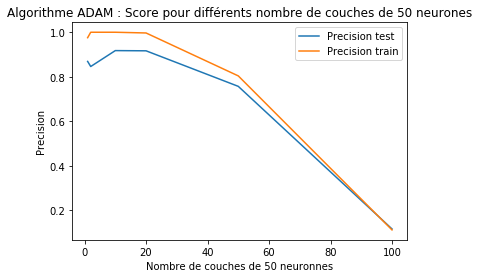

In [100]:
couche = (50,)
scores_couches_test = []
scores_couches_train = []

nb_couches = [1, 2, 10, 20, 50, 100]

for i in nb_couches:
    clf = MLPClassifier(hidden_layer_sizes=(couche*i), solver='adam')
    clf.fit(xtrain, ytrain)

    score_test = clf.score(xtest, ytest)
    scores_couches_test.append(score_test)
    
    score_train = clf.score(xtrain, ytrain)
    scores_couches_train.append(score_train)
    
    print("Couches : " + str(i) + " -> " + str(score_test))
    print("Couches : " + str(i) + " -> " + str(score_train))
    
plt.plot([x for x in nb_couches], scores_couches_test)
plt.plot([x for x in nb_couches], scores_couches_train)

plt.legend(['Precision test', 'Precision train'], loc='upper right')
plt.xlabel("Nombre de couches de 50 neuronnes")
plt.ylabel("Precision")
plt.title("Algorithme ADAM : Score pour différents nombre de couches de 50 neurones")

Couches : 1 -> 0.8533333333333334
Couches : 1 -> 0.9797959183673469
Couches : 2 -> 0.8657142857142858
Couches : 2 -> 0.9844897959183674
Couches : 10 -> 0.8595238095238096
Couches : 10 -> 0.9806122448979592
Couches : 20 -> 0.8552380952380952
Couches : 20 -> 0.966530612244898
Couches : 50 -> 0.8614285714285714
Couches : 50 -> 0.9644897959183674
Couches : 100 -> 0.8266666666666667
Couches : 100 -> 0.9083673469387755


Text(0.5, 1.0, 'Activation IDENTITY : Score pour différents nombre de couches de 50 neurones')

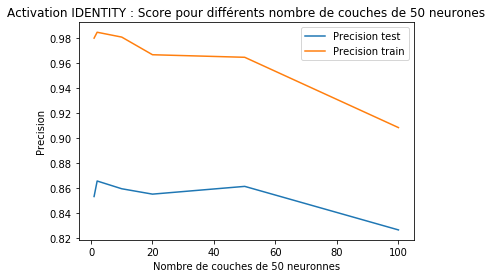

In [101]:
couche = (50,)
scores_couches_test = []
scores_couches_train = []

nb_couches = [1, 2, 10, 20, 50, 100]

for i in nb_couches:
    clf = MLPClassifier(hidden_layer_sizes=(couche*i), activation='identity')
    clf.fit(xtrain, ytrain)

    score_test = clf.score(xtest, ytest)
    scores_couches_test.append(score_test)
    
    score_train = clf.score(xtrain, ytrain)
    scores_couches_train.append(score_train)
    
    print("Couches : " + str(i) + " -> " + str(score_test))
    print("Couches : " + str(i) + " -> " + str(score_train))
    
plt.plot([x for x in nb_couches], scores_couches_test)
plt.plot([x for x in nb_couches], scores_couches_train)

plt.legend(['Precision test', 'Precision train'], loc='upper right')
plt.xlabel("Nombre de couches de 50 neuronnes")
plt.ylabel("Precision")
plt.title("Activation IDENTITY : Score pour différents nombre de couches de 50 neurones")

Couches : 1 -> 0.9080952380952381
Couches : 1 -> 0.9775510204081632
Couches : 2 -> 0.8990476190476191
Couches : 2 -> 0.9746938775510204
Couches : 10 -> 0.11714285714285715
Couches : 10 -> 0.11285714285714285
Couches : 20 -> 0.11714285714285715
Couches : 20 -> 0.11285714285714285
Couches : 50 -> 0.11714285714285715
Couches : 50 -> 0.11285714285714285
Couches : 100 -> 0.11714285714285715
Couches : 100 -> 0.11285714285714285


Text(0.5, 1.0, 'Activation LOGISTIC : Score pour différents nombre de couches de 50 neurones')

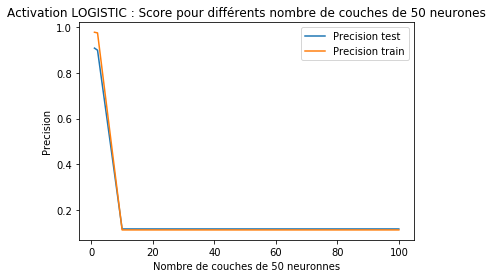

In [104]:
couche = (50,)
scores_couches_test = []
scores_couches_train = []

nb_couches = [1, 2, 10, 20, 50, 100]

for i in nb_couches:
    clf = MLPClassifier(hidden_layer_sizes=(couche*i), activation='logistic')
    clf.fit(xtrain, ytrain)

    score_test = clf.score(xtest, ytest)
    scores_couches_test.append(score_test)
    
    score_train = clf.score(xtrain, ytrain)
    scores_couches_train.append(score_train)
    
    print("Couches : " + str(i) + " -> " + str(score_test))
    print("Couches : " + str(i) + " -> " + str(score_train))
    
plt.plot([x for x in nb_couches], scores_couches_test)
plt.plot([x for x in nb_couches], scores_couches_train)

plt.legend(['Precision test', 'Precision train'], loc='upper right')
plt.xlabel("Nombre de couches de 50 neuronnes")
plt.ylabel("Precision")
plt.title("Activation LOGISTIC : Score pour différents nombre de couches de 50 neurones")

Couches : 1 -> 0.8690476190476191
Couches : 1 -> 0.9183673469387755
Couches : 2 -> 0.8804761904761905
Couches : 2 -> 0.9279591836734694
Couches : 10 -> 0.8542857142857143
Couches : 10 -> 0.9006122448979592
Couches : 20 -> 0.8380952380952381
Couches : 20 -> 0.8693877551020408
Couches : 50 -> 0.11047619047619048
Couches : 50 -> 0.11979591836734693
Couches : 100 -> 0.09952380952380953
Couches : 100 -> 0.1063265306122449


Text(0.5, 1.0, 'Activation TANH : Score pour différents nombre de couches de 50 neurones')

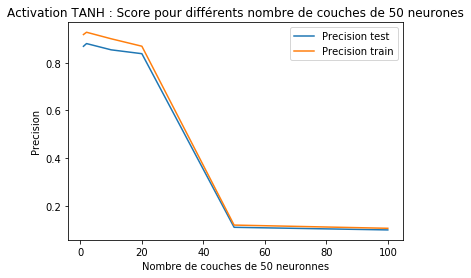

In [102]:
couche = (50,)
scores_couches_test = []
scores_couches_train = []

nb_couches = [1, 2, 10, 20, 50, 100]

for i in nb_couches:
    clf = MLPClassifier(hidden_layer_sizes=(couche*i), activation='tanh')
    clf.fit(xtrain, ytrain)

    score_test = clf.score(xtest, ytest)
    scores_couches_test.append(score_test)
    
    score_train = clf.score(xtrain, ytrain)
    scores_couches_train.append(score_train)
    
    print("Couches : " + str(i) + " -> " + str(score_test))
    print("Couches : " + str(i) + " -> " + str(score_train))
    
plt.plot([x for x in nb_couches], scores_couches_test)
plt.plot([x for x in nb_couches], scores_couches_train)

plt.legend(['Precision test', 'Precision train'], loc='upper right')
plt.xlabel("Nombre de couches de 50 neuronnes")
plt.ylabel("Precision")
plt.title("Activation TANH : Score pour différents nombre de couches de 50 neurones")

Couches : 1 -> 0.8471428571428572
Couches : 1 -> 0.9828571428571429
Couches : 2 -> 0.8466666666666667
Couches : 2 -> 0.9642857142857143
Couches : 10 -> 0.9061904761904762
Couches : 10 -> 0.993265306122449
Couches : 20 -> 0.9252380952380952
Couches : 20 -> 0.9977551020408163
Couches : 50 -> 0.6952380952380952
Couches : 50 -> 0.7622448979591837
Couches : 100 -> 0.11714285714285715
Couches : 100 -> 0.11285714285714285


Text(0.5, 1.0, 'Activation RELU : Score pour différents nombre de couches de 50 neurones')

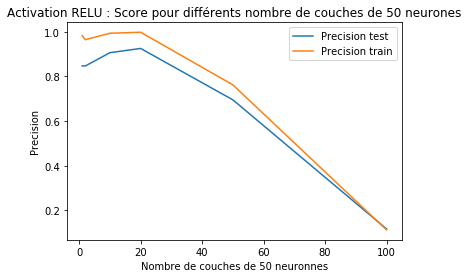

In [103]:
couche = (50,)
scores_couches_test = []
scores_couches_train = []

nb_couches = [1, 2, 10, 20, 50, 100]

for i in nb_couches:
    clf = MLPClassifier(hidden_layer_sizes=(couche*i), activation='relu')
    clf.fit(xtrain, ytrain)

    score_test = clf.score(xtest, ytest)
    scores_couches_test.append(score_test)
    
    score_train = clf.score(xtrain, ytrain)
    scores_couches_train.append(score_train)
    
    print("Couches : " + str(i) + " -> " + str(score_test))
    print("Couches : " + str(i) + " -> " + str(score_train))
    
plt.plot([x for x in nb_couches], scores_couches_test)
plt.plot([x for x in nb_couches], scores_couches_train)

plt.legend(['Precision test', 'Precision train'], loc='upper right')
plt.xlabel("Nombre de couches de 50 neuronnes")
plt.ylabel("Precision")
plt.title("Activation RELU : Score pour différents nombre de couches de 50 neurones")

In [ ]:
couche = (50,)
scores_couches_test = []
scores_couches_train = []

nb_couches = [1, 2, 10, 20, 50, 100]
alphas = [0.0001, 0.001, 0.01, 0.1, 1]

for alpha in alphas:

    for i in nb_couches:
        clf = MLPClassifier(hidden_layer_sizes=(couche*i), alpha=alpha)
        clf.fit(xtrain, ytrain)

        score_test = clf.score(xtest, ytest)
        scores_couches_test.append(score_test)

        score_train = clf.score(xtrain, ytrain)
        scores_couches_train.append(score_train)

        print("Couches : " + str(i) + " -> " + str(score_test))
        print("Couches : " + str(i) + " -> " + str(score_train))

    plt.plot([x for x in nb_couches], scores_couches_test)
    plt.plot([x for x in nb_couches], scores_couches_train)

plt.legend(['Precision test', 'Precision train'], loc='upper right')
plt.xlabel("Nombre de couches de 50 neuronnes")
plt.ylabel("Precision")
plt.title("Activation ALPHA=" + str(alpha) + " : Score pour différents nombre de couches de 50 neurones")

Couches : 1 -> 0.8595238095238096
Couches : 1 -> 0.9993877551020408
Couches : 2 -> 0.8257142857142857
Couches : 2 -> 1.0
Couches : 10 -> 0.9223809523809524
Couches : 10 -> 1.0
Couches : 20 -> 0.9157142857142857
Couches : 20 -> 0.9942857142857143
Couches : 50 -> 0.8333333333333334
Couches : 50 -> 0.9022448979591837
Couches : 100 -> 0.11714285714285715
Couches : 100 -> 0.11285714285714285
Couches : 1 -> 0.8504761904761905
Couches : 1 -> 1.0
Couches : 2 -> 0.8457142857142858
Couches : 2 -> 0.9997959183673469
Couches : 10 -> 0.9014285714285715
Couches : 10 -> 0.9920408163265306
Couches : 20 -> 0.9185714285714286
Couches : 20 -> 0.9889795918367347
